In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
data = pd.read_pickle('data/data.pkl')

In [12]:
meta_features = ['id', 'amount', 'age', 'sex', 'ins_type', 'target']
meta_data = data.drop_duplicates(subset=['id'])[meta_features].reset_index(drop=True)

### General dataset description

In [13]:
number_of_users = len(data.id.unique())
print('Number of users: ', number_of_users)

mean_length = len(data) / number_of_users
print('Average number of records per user: ', round(mean_length, 2))

target = data.groupby(['id'])['target'].mean()
postive_class_size = sum(target > 0)
print('The size of positive class: ', postive_class_size)

positive_class_rate = postive_class_size / len(target) * 100
print('Positive class rate: ', round(positive_class_rate, 2))

Number of users:  381013
Average number of records per user:  8.6
The size of positive class:  5707
Positive class rate:  1.5


### Correlation 

In [14]:
data.corr()

,adj,amount,age,sex,ins_type,billing_type,num_treatments,factor,cost,target
adj,1.000000,0.310522,-0.004052,0.001203,-0.000051,0.016901,0.026715,0.004124,0.149400,0.244489
amount,0.310522,1.000000,0.057510,0.037416,-0.007628,0.072503,0.038216,-0.013798,0.193027,0.185377
age,-0.004052,0.057510,1.000000,0.087386,-0.001309,0.020161,-0.013714,-0.036555,-0.002568,0.003028
sex,0.001203,0.037416,0.087386,1.000000,0.039162,0.000476,-0.005383,-0.022276,0.003729,-0.001905
ins_type,-0.000051,-0.007628,-0.001309,0.039162,1.000000,-0.000212,-0.002315,-0.000003,0.000077,-0.003226
billing_type,0.016901,0.072503,0.020161,0.000476,-0.000212,1.000000,-0.004756,0.063820,0.112581,0.029262
num_treatments,0.026715,0.038216,-0.013714,-0.005383,-0.002315,-0.004756,1.000000,0.063060,0.180564,0.009320
factor,0.004124,-0.013798,-0.036555,-0.022276,-0.000003,0.063820,0.063060,1.000000,0.130514,0.006805
cost,0.149400,0.193027,-0.002568,0.003729,0.000077,0.112581,0.180564,0.130514,1.000000,0.031781
target,0.244489,0.185377,0.003028,-0.001905,-0.003226,0.029262,0.009320,0.006805,0.031781,1.000000


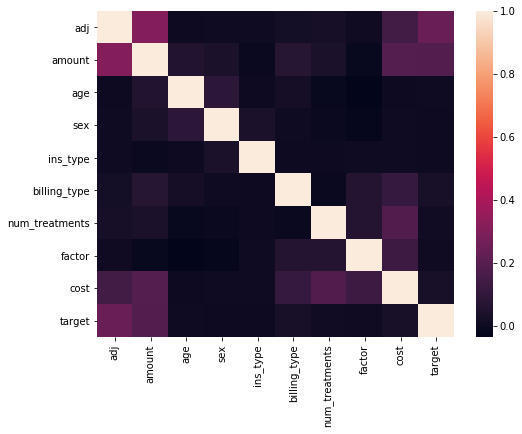

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr())

### Invoice amount per document


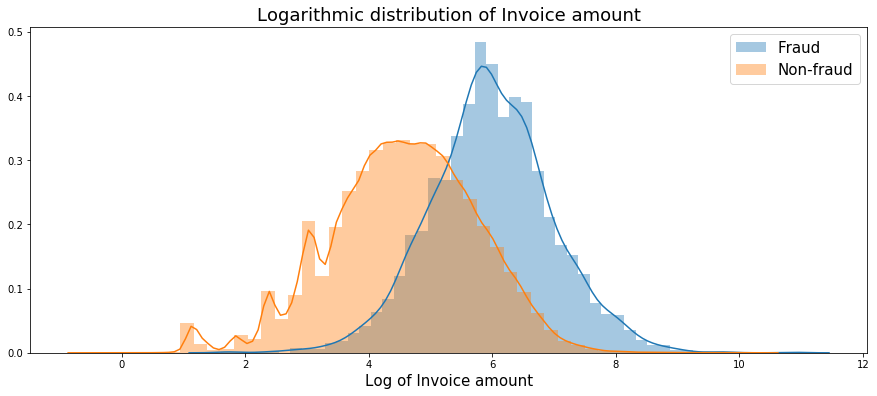

In [16]:
plt.figure(figsize=(15, 6))
sns.distplot(np.log(meta_data[meta_data.target==1].amount), label = 'Fraud') 
sns.distplot(np.log(meta_data[meta_data.target==0].amount), label = 'Non-fraud') 
plt.xlabel('Log of Invoice amount', fontsize=15)
plt.title('Logarithmic distribution of Invoice amount', fontsize=18);
plt.legend(fontsize=15)
# plt.savefig('rechnungsbetrag.png', dpi=150)

### Age of the user

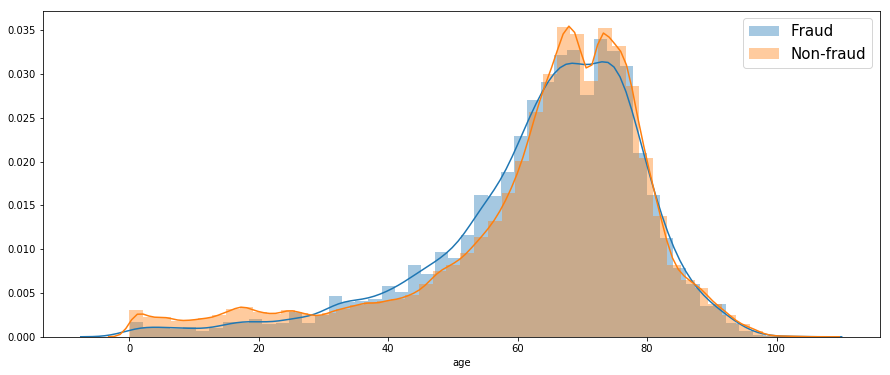

In [8]:
plt.figure(figsize=(15, 6))
sns.distplot(meta_data[meta_data.target==1].age, label = 'Fraud')
sns.distplot(meta_data[meta_data.target==0].age, label = 'Non-fraud')
plt.legend(fontsize=15)
#plt.savefig("alter.png", dpi=150)

### Gender of the user (0/1-coded)


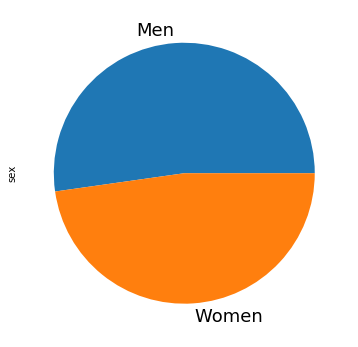

In [9]:
meta_data.sex.value_counts().plot.pie(figsize=(6, 6),labels=['Men', 'Women'], fontsize=18)

###  The insurance type of the user

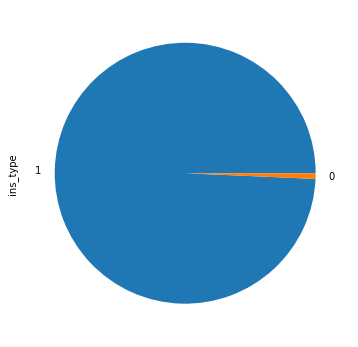

In [10]:
data.ins_type.value_counts().plot.pie(figsize=(6, 6));

###  NUMMER: NUMBER: Fee number describing the treatment (mapped to anonymous values) per line


In [28]:
data.NUMMER.head()

0     A_178
1     A_765
2     A_764
3    A_1257
4     A_777
Name: NUMMER, dtype: object

In [29]:
data.NUMMER.unique().shape[0]

1940

###  NUMMER_KAT: NUMBER_KAT: Upper category of the fee number (mapped to anonymous values) per line


In [30]:
data.NUMMER_KAT.head()

0    AA_10
1    AA_13
2    AA_13
3     AA_3
4    AA_13
Name: NUMMER_KAT, dtype: object

In [31]:
data.NUMMER_KAT.unique().shape[0]

17

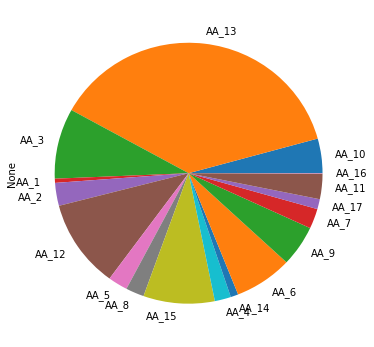

In [32]:
## number of treatments per kategory

kategories = data.NUMMER_KAT.unique()
kategory_number = []
for kategory in kategories:
    kategory_number.append(data[data.NUMMER_KAT == kategory].NUMMER.unique().shape[0])
    
pd.Series(index=kategories, data=kategory_number).plot.pie(figsize=(6, 6));

### TYP: TYPE: Special type of billing ("analogue calculation", 0/1-coded) per line

In [33]:
data.TYP.value_counts(dropna=False) / data.TYP.value_counts(dropna=False).sum() * 100

 0.0    89.5935
NaN      9.1690
 1.0     1.2375
Name: TYP, dtype: float64

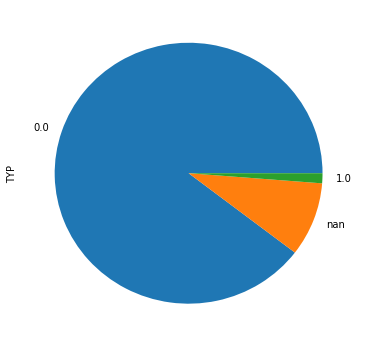

In [34]:
data.TYP.value_counts(dropna=False).plot.pie(figsize=(6, 6));

### ANZAHL: NUMBER: number of treatments per line


In [35]:
data.ANZAHL.value_counts(dropna=False)

1     962250
2      19089
3      12543
4       2225
5        930
6        639
8        589
10       275
7        230
16       228
20       216
9        163
12       142
11        78
15        72
13        63
14        47
30        42
18        34
17        28
19        24
22        13
24        11
40        11
32         6
23         5
36         4
25         4
26         4
27         3
28         3
29         3
38         3
48         3
33         3
34         3
50         2
31         2
21         2
60         1
56         1
61         1
35         1
46         1
42         1
39         1
72         1
Name: ANZAHL, dtype: int64

### FAKTOR: FACTOR: increase factor of treatment per line


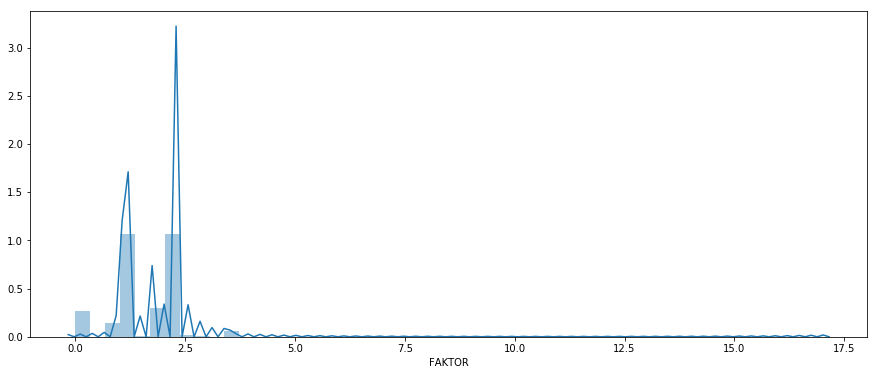

In [36]:
plt.figure(figsize=(15, 6))
sns.distplot(data.FAKTOR)

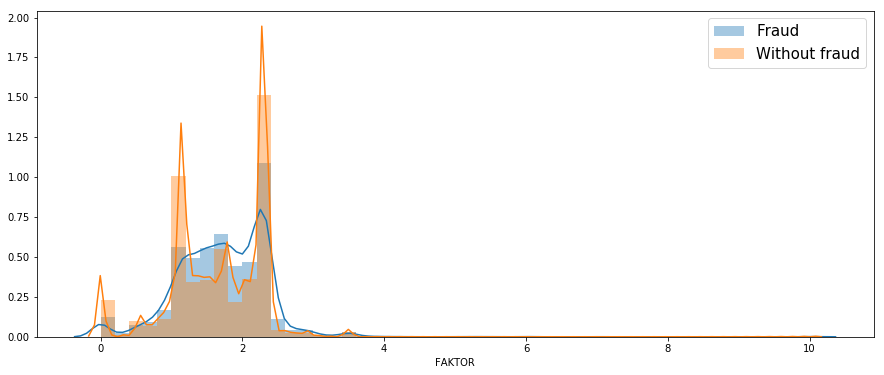

In [37]:
plt.figure(figsize=(15, 6))
sns.distplot(data[data.target==1].groupby(['ID'])['FAKTOR'].mean(), label='Fraud')
sns.distplot(data[data.target==0].groupby(['ID'])['FAKTOR'].mean(), label='Without fraud')
plt.legend(fontsize=15)

### BETRAG: AMOUNT: Cost of treatment per line


In [38]:
min(data.BETRAG / data.ANZAHL)

-16.086666107177734

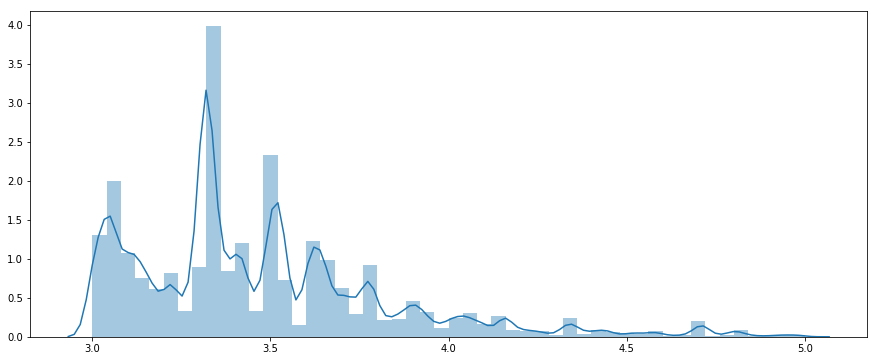

In [39]:
plt.figure(figsize=(15, 6))
vals = np.log(data.BETRAG / data.ANZAHL + 17)
vals = vals.iloc[np.where(vals >3)]
vals = vals.iloc[np.where(vals <5)]
sns.distplot(vals);
plt.savefig('betrag.png', dpi=150)

### ART: TYPE: Material cost type (mapped to anonymous values) per line


In [40]:
data.ART.value_counts(dropna=False)

NaN     908310
B_2      74393
B_3      14253
B_13      1816
B_1        998
B_9        135
B_6         59
B_14        33
B_11         1
B_8          1
B_4          1
Name: ART, dtype: int64

### LEISTUNG: PERFORMANCE: Type of benefits (grouping of treatments into collectively agreed types of benefits, mapped to anonymous values) per line


In [ ]:
data.LEISTUNG.value_counts(dropna=False)